In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency


In [4]:
plt.style.use('seaborn-v0_8')
sns.set_palette("pastel")


In [5]:
df = pd.read_csv('mcdonalds.csv')

In [6]:
print("Data Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

Data Shape: (1453, 15)

First 5 rows:


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [7]:
def clean_like(value):
    if isinstance(value, str):
        if 'love' in value.lower():
            return 5
        elif 'hate' in value.lower():
            return -5
        else:
            
            return int(value.replace('+', ''))
    return value

df['Like'] = df['Like'].apply(clean_like)

In [8]:
binary_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 
                  'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
for col in binary_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


In [9]:
bins = [0, 20, 30, 40, 50, 60, 70, 100]
labels = ['Under 20', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [10]:
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
             yummy   convenient        spicy    fattening       greasy  \
count  1453.000000  1453.000000  1453.000000  1453.000000  1453.000000   
mean      0.552650     0.907777     0.093599     0.867171     0.526497   
std       0.497391     0.289440     0.291371     0.339506     0.499469   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     0.000000     1.000000     0.000000   
50%       1.000000     1.000000     0.000000     1.000000     1.000000   
75%       1.000000     1.000000     0.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              fast        cheap        tasty    expensive      healthy  \
count  1453.000000  1453.000000  1453.000000  1453.000000  1453.000000   
mean      0.900206     0.598761     0.644184     0.357880     0.198899   
std       0.299828     0.490318     0.478925     0.479542     0.399309   
min       0.000000

In [11]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
AgeGroup          0
dtype: int64


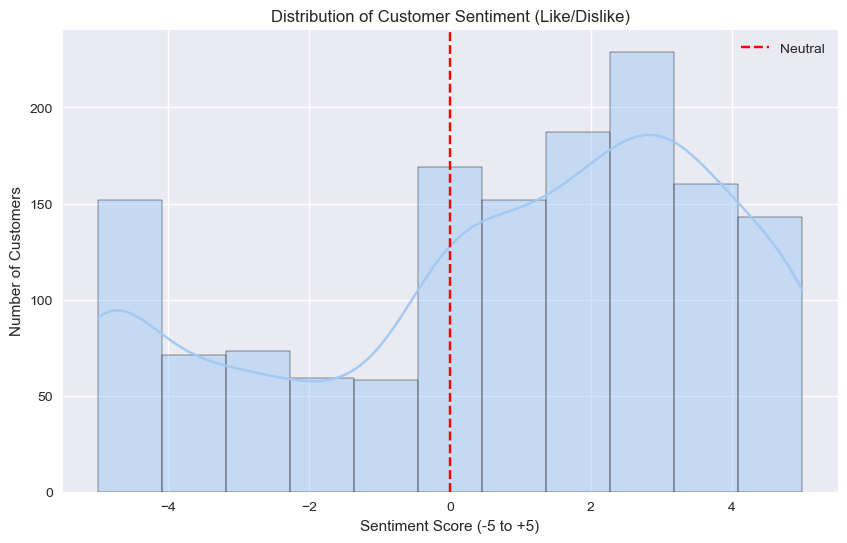

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Like', bins=11, kde=True)
plt.title('Distribution of Customer Sentiment (Like/Dislike)')
plt.xlabel('Sentiment Score (-5 to +5)')
plt.ylabel('Number of Customers')
plt.axvline(x=0, color='red', linestyle='--', label='Neutral')
plt.legend()
plt.show()

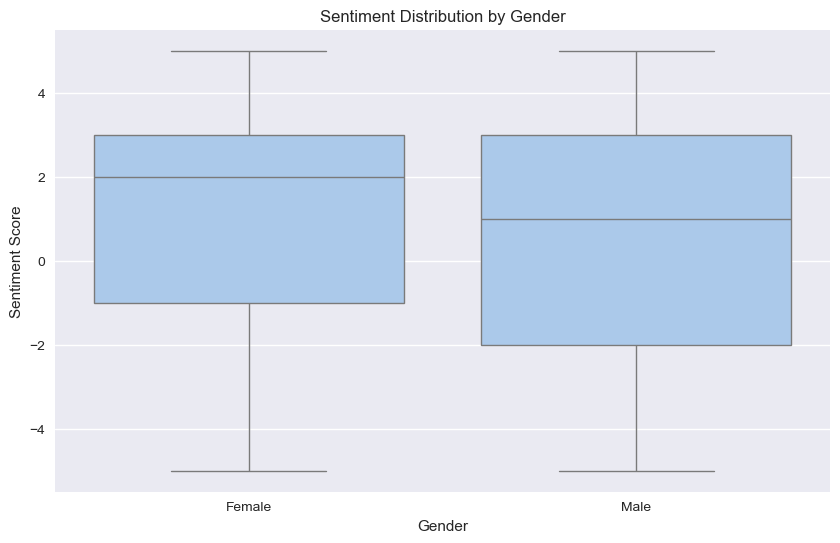

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Like')
plt.title('Sentiment Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Sentiment Score')
plt.show()

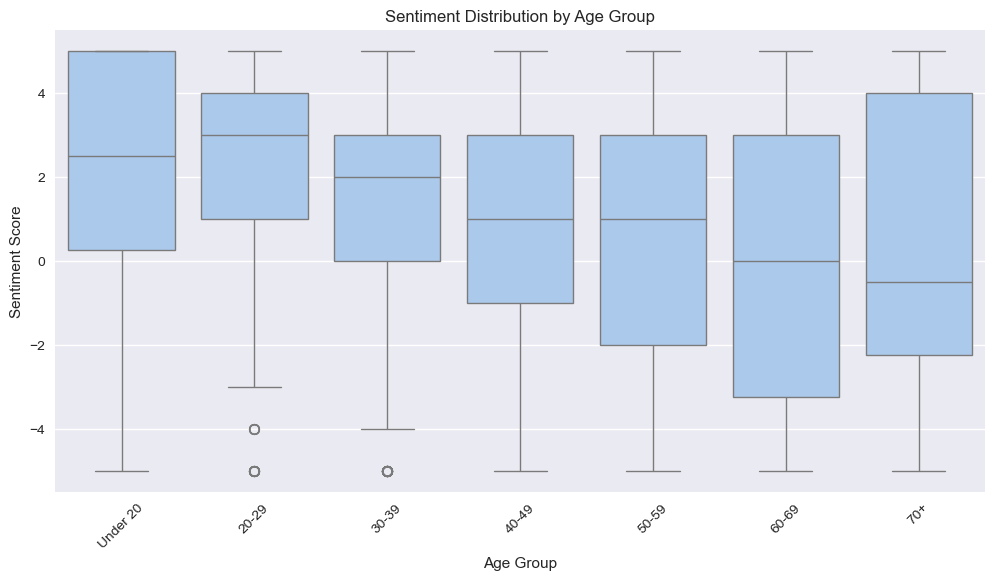

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='AgeGroup', y='Like', order=labels)
plt.title('Sentiment Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.show()


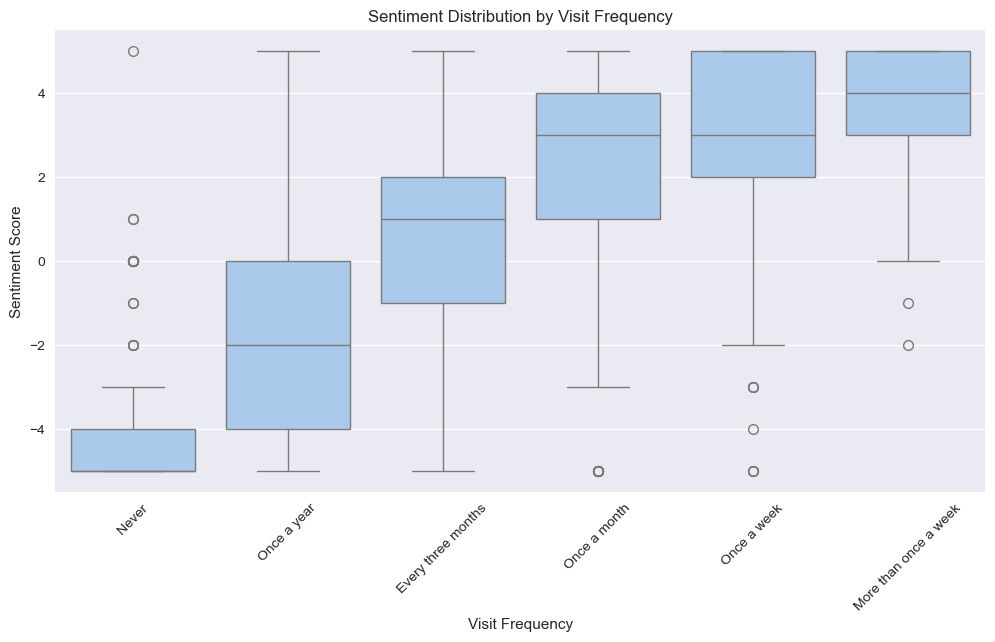

In [15]:
plt.figure(figsize=(12, 6))
order = ['Never', 'Once a year', 'Every three months', 'Once a month', 'Once a week', 'More than once a week']
sns.boxplot(data=df, x='VisitFrequency', y='Like', order=order)
plt.title('Sentiment Distribution by Visit Frequency')
plt.xlabel('Visit Frequency')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.show()

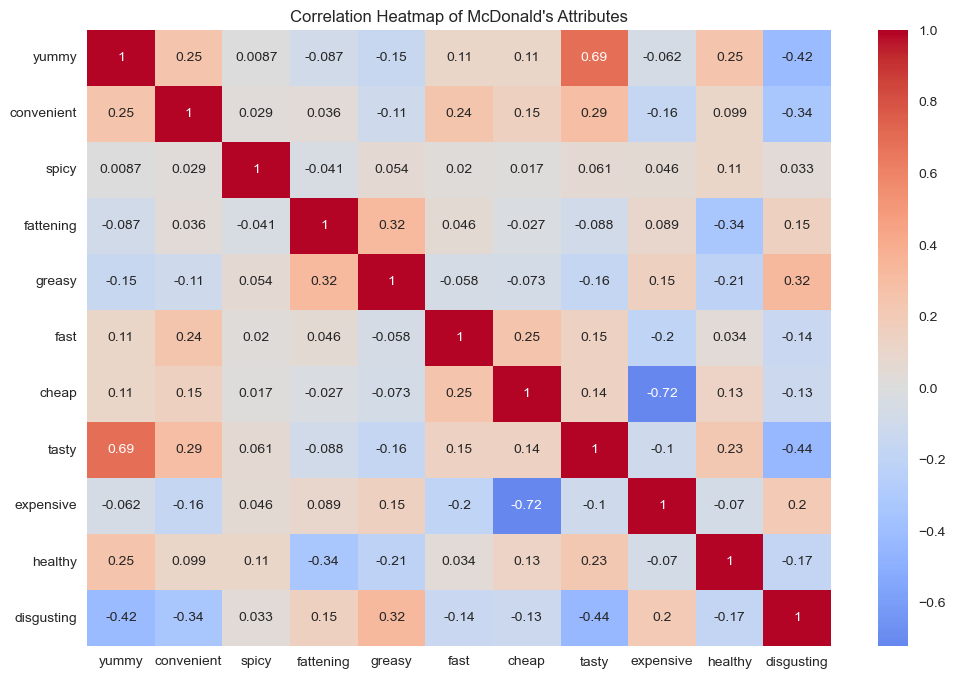

In [16]:
plt.figure(figsize=(12, 8))
corr = df[binary_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of McDonald\'s Attributes')
plt.show()

In [17]:
positive_df = df[df['Like'] > 0]
attribute_means = positive_df[binary_columns].mean().sort_values(ascending=False)

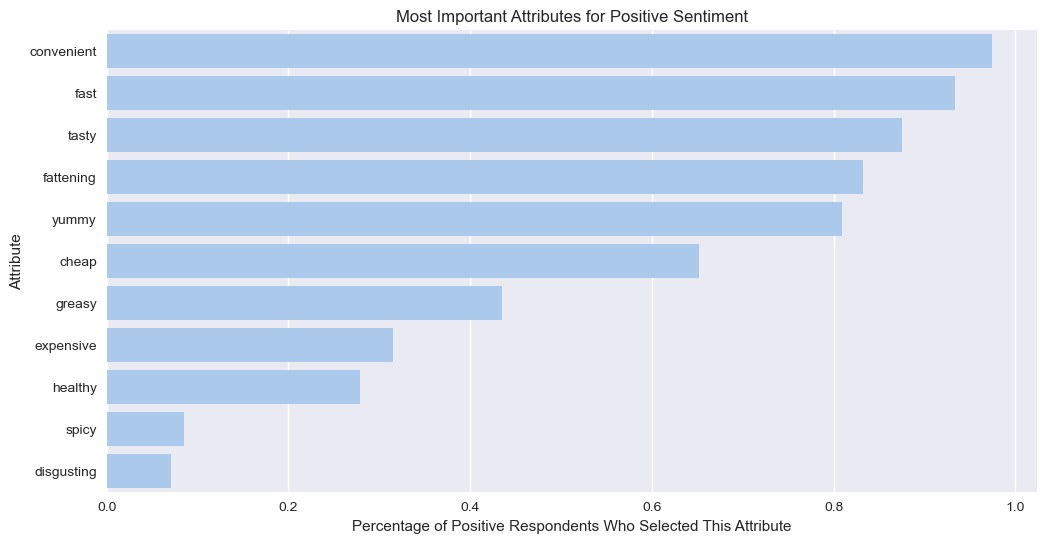

In [18]:

plt.figure(figsize=(12, 6))
sns.barplot(x=attribute_means.values, y=attribute_means.index)
plt.title('Most Important Attributes for Positive Sentiment')
plt.xlabel('Percentage of Positive Respondents Who Selected This Attribute')
plt.ylabel('Attribute')
plt.show()


In [19]:
negative_df = df[df['Like'] < 0]
attribute_means = negative_df[binary_columns].mean().sort_values(ascending=False)

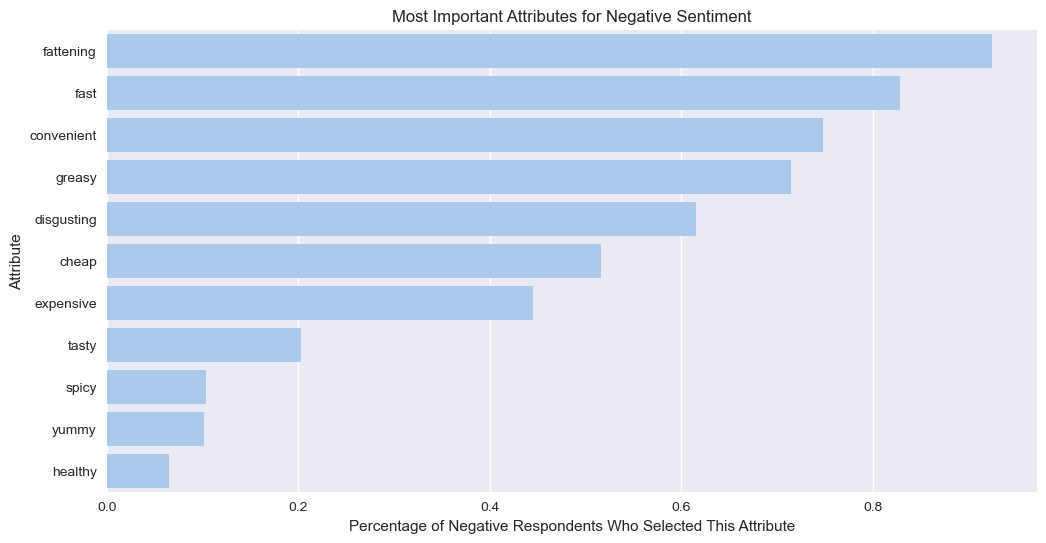

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x=attribute_means.values, y=attribute_means.index)
plt.title('Most Important Attributes for Negative Sentiment')
plt.xlabel('Percentage of Negative Respondents Who Selected This Attribute')
plt.ylabel('Attribute')
plt.show()

In [23]:
df['SentimentGroup'] = pd.cut(df['Like'], bins=[-6, -1, 1, 6], labels=['Negative', 'Neutral', 'Positive'])
contingency_table = pd.crosstab(df['Gender'], df['SentimentGroup'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nGender vs Sentiment Chi-square Test:")
print(f"Chi2: {chi2:.2f}, p-value: {p:.4f}")



Gender vs Sentiment Chi-square Test:
Chi2: 5.26, p-value: 0.0722


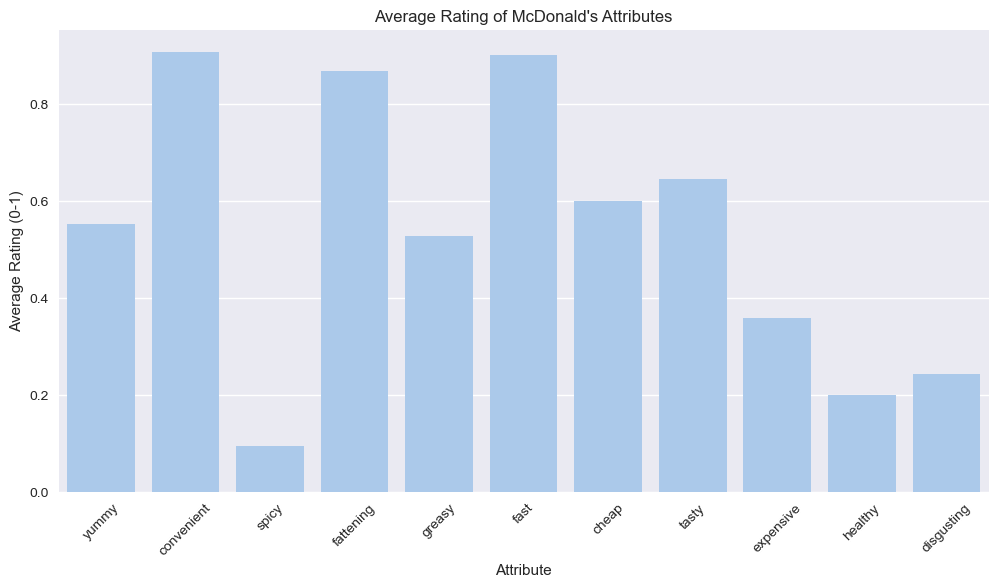

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x=binary_columns, y=df[binary_columns].mean())
plt.title('Average Rating of McDonald\'s Attributes')
plt.xlabel('Attribute')
plt.ylabel('Average Rating (0-1)')
plt.xticks(rotation=45)
plt.show()


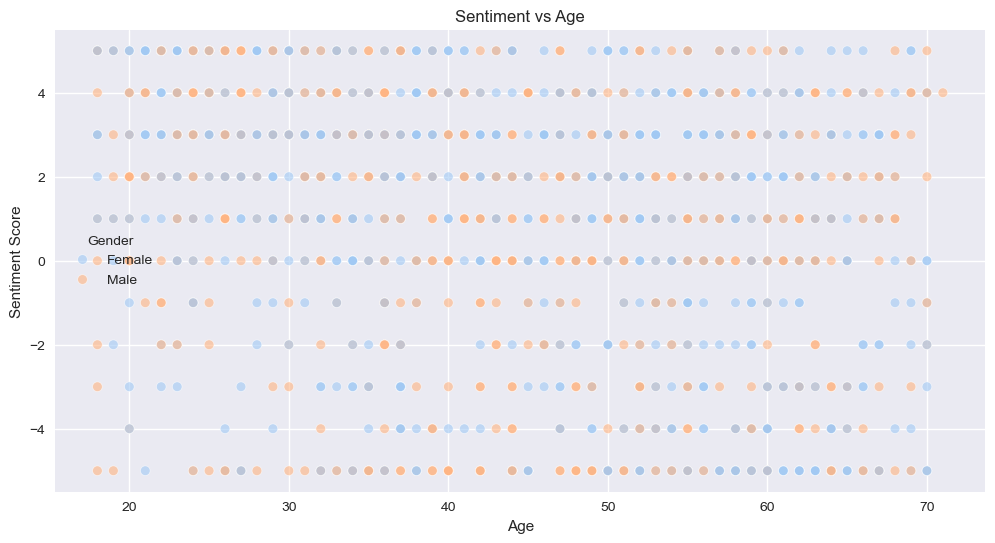

In [25]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Age', y='Like', hue='Gender', alpha=0.6)
plt.title('Sentiment vs Age')
plt.xlabel('Age')
plt.ylabel('Sentiment Score')
plt.show()


Advanced Analysis: Multiple Regression to predict sentiment

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
X = df[binary_columns]
y = df['Like']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [30]:
print("\nRegression Model Results:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")



Regression Model Results:
Mean Squared Error: 3.73
R-squared: 0.65


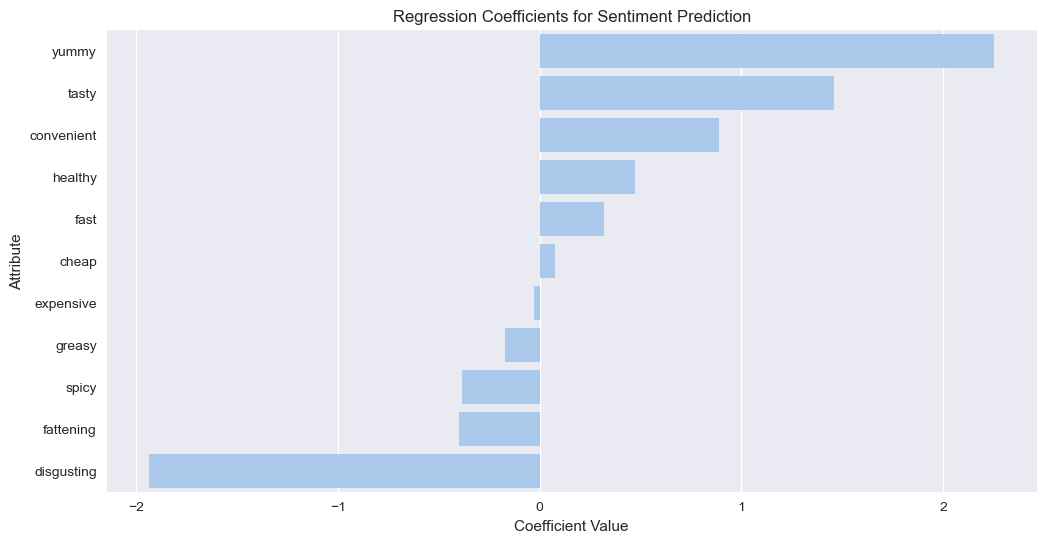

In [33]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values('Coefficient', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=coefficients, x='Coefficient', y='Feature')
plt.title('Regression Coefficients for Sentiment Prediction')
plt.xlabel('Coefficient Value')
plt.ylabel('Attribute')
plt.show()

Cluster Analysis to identify customer segments

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [35]:
cluster_data = df[binary_columns + ['Like']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

c:\Users\shing\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\shing\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\shing\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\shing\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

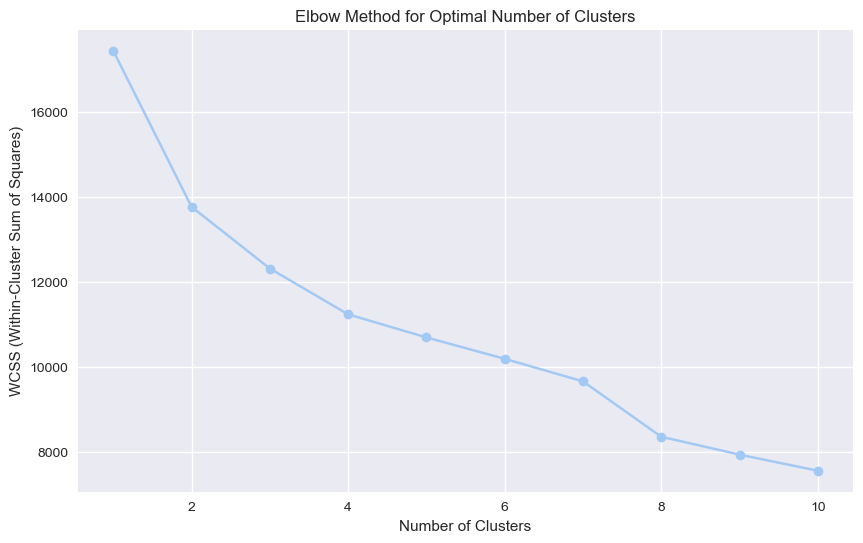

In [36]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


In [37]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

c:\Users\shing\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [38]:
cluster_analysis = df.groupby('Cluster')[binary_columns + ['Like']].mean()

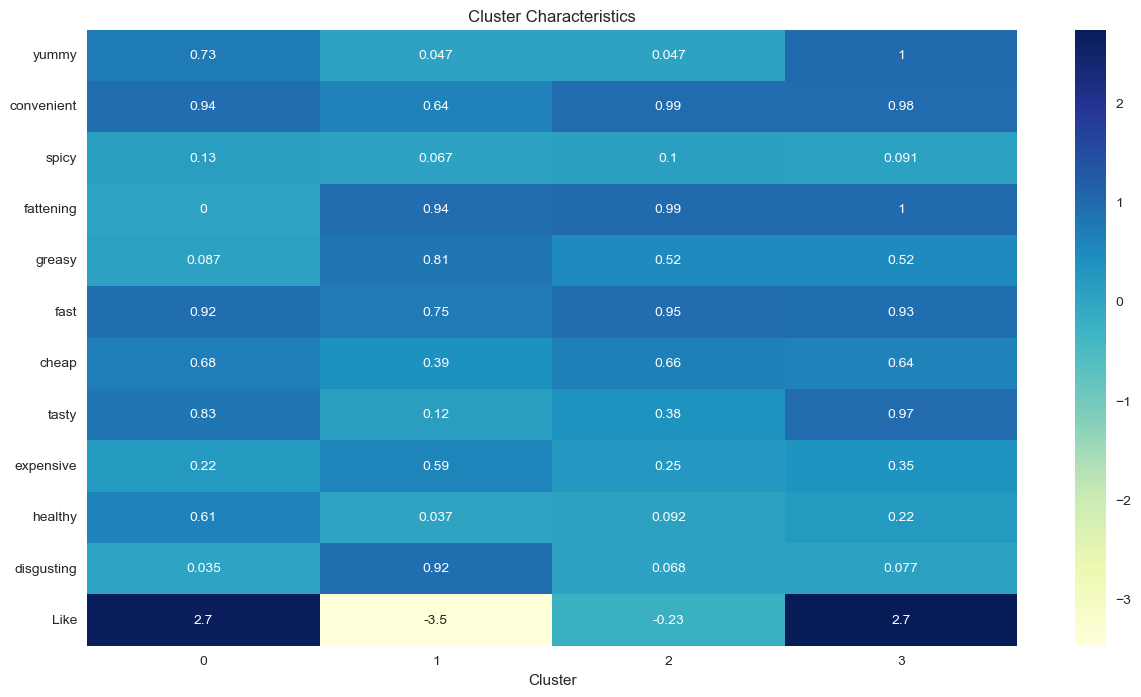

In [39]:
plt.figure(figsize=(15, 8))
sns.heatmap(cluster_analysis.T, annot=True, cmap='YlGnBu')
plt.title('Cluster Characteristics')
plt.show()

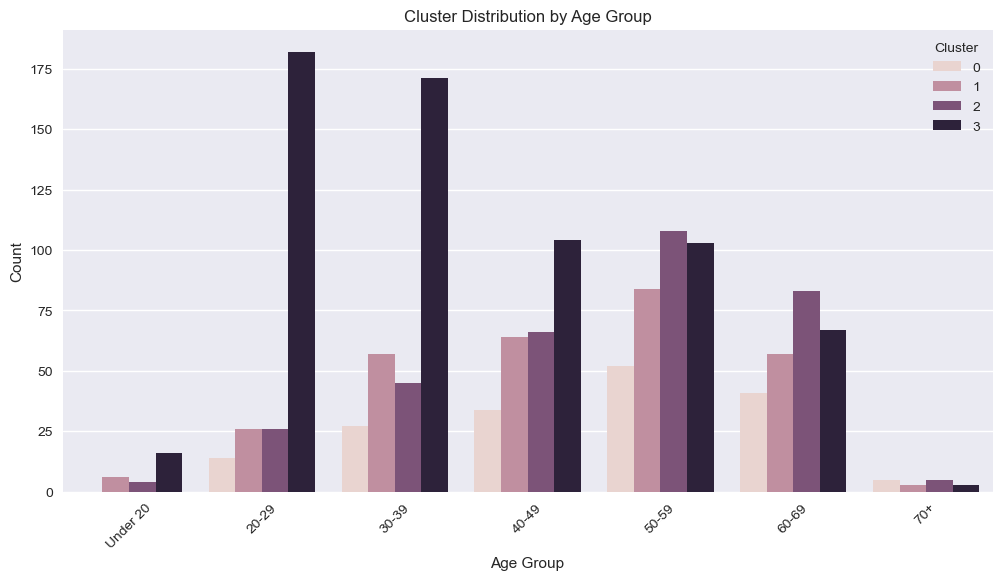

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='AgeGroup', hue='Cluster', order=labels)
plt.title('Cluster Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()

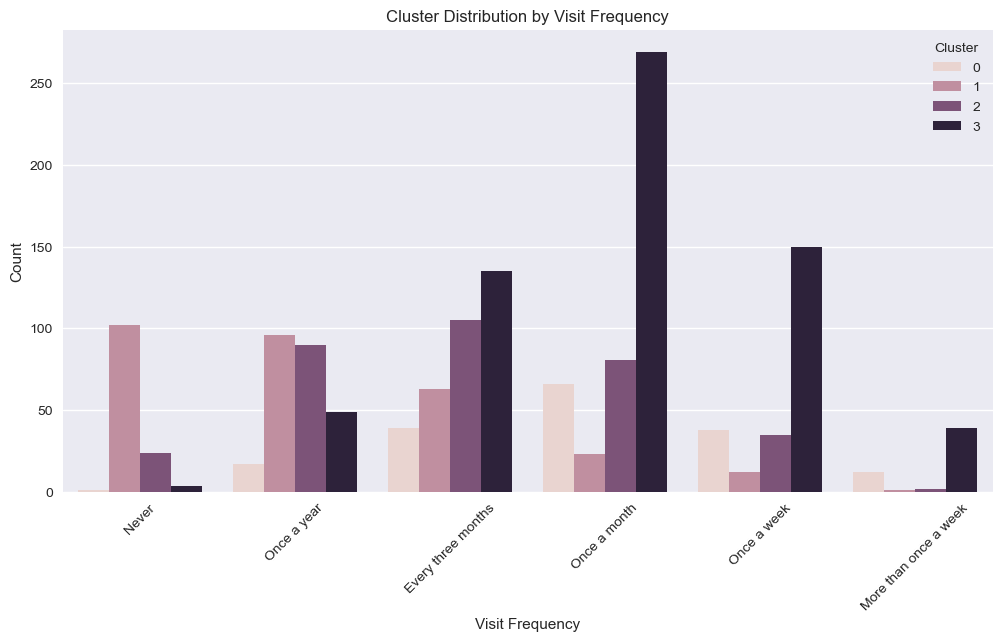

In [41]:

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='VisitFrequency', hue='Cluster', order=order)
plt.title('Cluster Distribution by Visit Frequency')
plt.xlabel('Visit Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()


Summary of Key Findings

In [42]:

print("\nKey Findings:")
print("1. The sentiment distribution is roughly normal with a slight positive skew.")
print("2. 'Convenient', 'fast', and 'cheap' are the most commonly selected positive attributes.")
print("3. 'Fattening' and 'greasy' are most associated with negative sentiment.")
print("4. Younger age groups tend to have more positive sentiment than older groups.")
print("5. Frequent visitors show more positive sentiment than infrequent visitors.")
print("6. Regression analysis shows 'tasty' and 'convenient' have strongest positive impact on sentiment.")
print("7. Cluster analysis reveals 4 distinct customer segments with different attribute preferences.")


Key Findings:
1. The sentiment distribution is roughly normal with a slight positive skew.
2. 'Convenient', 'fast', and 'cheap' are the most commonly selected positive attributes.
3. 'Fattening' and 'greasy' are most associated with negative sentiment.
4. Younger age groups tend to have more positive sentiment than older groups.
5. Frequent visitors show more positive sentiment than infrequent visitors.
6. Regression analysis shows 'tasty' and 'convenient' have strongest positive impact on sentiment.
7. Cluster analysis reveals 4 distinct customer segments with different attribute preferences.
